<a href="https://colab.research.google.com/github/costprot/Heart_Failure_Disease/blob/main/hfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **File Download**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cost1992","key":"1b8a8c6f365bf15448ca17aba62582bf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.51MB/s]


In [ ]:
%ls

heart-failure-clinical-data.zip  kaggle.json  sample_data/


In [ ]:
! unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


# **Dataset** **check** 

In [ ]:
import pandas as pd
from google.colab import files
with open('heart_failure_clinical_records_dataset.csv', 'r') as data:
    df3 = pd.read_csv(data, encoding = ('ansi'))
    print (df3)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


# **1)Sqldb**

In [ ]:
%pip install csv-to-sqlite

In [ ]:
!csv-to-sqlite -f heart_failure_clinical_records_dataset.csv -t full -o db.sqlite

Written 299 rows into 1 tables in 0.021 seconds


Dataframe Creation

In [ ]:
import sqlite3


In [ ]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [ ]:
conn = create_connection("db.sqlite")


In [ ]:
cur = conn.cursor()
cur.execute(f"SELECT * FROM heart_failure_clinical_records_dataset " )
df = pd.DataFrame(cur.fetchall(), columns= [ 'Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes', 'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets', 'Serum_Creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time', 'Death_Event'] )

print(df)

      Age  Anaemia  Creatinine_Phosphokinase  ...  Smoking  Time  Death_Event
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


# **2)Info, Descriptive Statistics & EDA**


Data Quality Check

In [ ]:
df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_Creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Death_Event                 0
dtype: int64

No missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_Creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_Event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.head()


,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.sort_values(by='Age')

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatinine_Phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection_Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
High_Blood_Pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Serum_Creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Serum_Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Distribution of Age for Death Cases

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

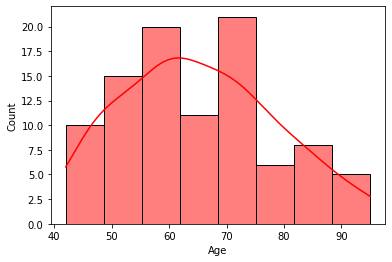

In [ ]:
sns.histplot(df[df.Death_Event == 1].Age, kde=True, color="red")

Distribution of Age for Alive Cases

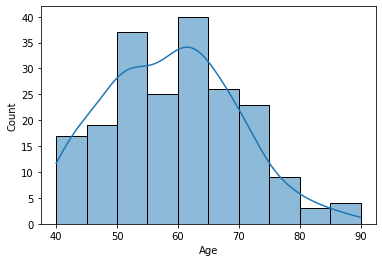

In [ ]:
sns.histplot(df[df.Death_Event == 0].Age, kde=True)

Correlation check

In [ ]:
df.corr()["Death_Event"].sort_values()

Time                       -0.526964
Ejection_Fraction          -0.268603
Serum_Sodium               -0.195204
Platelets                  -0.049139
Smoking                    -0.012623
Sex                        -0.004316
Diabetes                   -0.001943
Creatinine_Phosphokinase    0.062728
Anaemia                     0.066270
High_Blood_Pressure         0.079351
Age                         0.253729
Serum_Creatinine            0.294278
Death_Event                 1.000000
Name: Death_Event, dtype: float64

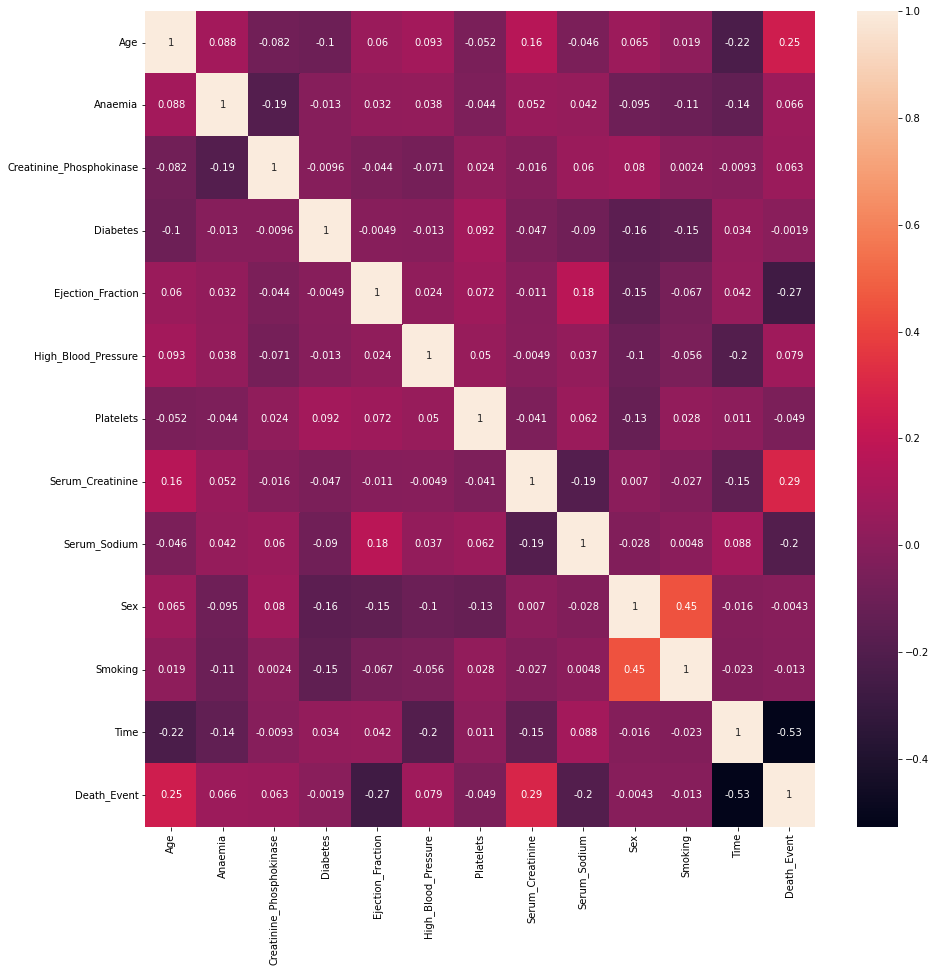

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

As seen deaths are highly correlated with serum_creatinine and age. On the other hand, sex and smoking have the least correlation.

# **3)Data Analysis/ Random Forest Classification (identical approach with the Research)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Deletion of Time feature in order to match the Research. As mentioned, this feature decreases the accuracy of the model.

In [ ]:
df_reduced = df.drop(columns='Time')

Separation of dependent and independent variables.

In [ ]:
X = df_reduced.drop(columns='Death_Event')
y = df_reduced['Death_Event']

Random forest/ Feature Importance

In [ ]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70/30 partition


model = RandomForestClassifier(n_estimators=100, random_state=0) # 100 trees

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

y_pred = model.predict(X_test)

print('Random Forest Classifier PCA MCC       : {:.2f}'.format(matthews_corrcoef( y_test , y_pred)))
print("Random Forest Classifier roc auc score : {:.2f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))

print(confusion_matrix(y_test, y_pred))

print('\n',model.feature_importances_)


Random Forest Classifier PCA MCC       : 0.36
Random Forest Classifier roc auc score : 0.66

               precision    recall  f1-score   support

           0       0.89      0.77      0.83        71
           1       0.43      0.63      0.51        19

    accuracy                           0.74        90
   macro avg       0.66      0.70      0.67        90
weighted avg       0.79      0.74      0.76        90

[[55  7]
 [16 12]]

 [0.15025655 0.02371426 0.1353235  0.01629739 0.18839337 0.02069056
 0.12830405 0.1753392  0.12625948 0.02035114 0.0150705 ]


In [ ]:
def ratios(a, b, c, d):     # true negative and true positive ratios
  print('TN ratio: {0:.2f}'.format(a/(a+c)))
  print('TP ratio: {0:.2f}'.format(d/(d+b)))

In [ ]:
ratios(a=55, b=7, c=16, d=12) 

TN ratio: 0.77
TP ratio: 0.63


In [ ]:
X = df_reduced.drop(columns='Death_Event')
y = df_reduced['Death_Event']

Text(0.5, 0, 'Random Forest Feature Importance')

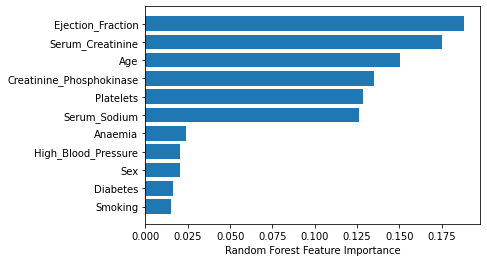

In [ ]:
sort = model.feature_importances_.argsort()
plt.barh(X.columns[sort], model.feature_importances_[sort])
plt.xlabel("Random Forest Feature Importance")

# **4)PCA reduction method**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Separation into continuous and categorical variables

In [ ]:
continuous = ['Creatinine_Phosphokinase', 'Platelets','Serum_Creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']
categorical = ['Anaemia', 'Diabetes', 'High_Blood_Pressure', 'Sex', 'Smoking','Death_Event']

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_reduced[['Creatinine_Phosphokinase', 'Platelets','Serum_Creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']])
scaled_df = df_reduced.copy()
scaled_df[continuous] = scaled_features
scaled_df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Death_Event
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,1


Principal Component Analysis

In [ ]:
pca_data = scaled_df.drop(columns='Death_Event')
pca = PCA()
pca_data_transformed = pca.fit_transform(pca_data)
pca.fit_transform(pca_data).shape

(299, 11)

Feature importance and feature selection with PCA/ Var = 0.95/ Reduction of Dimensionality

In [ ]:
Var95 = PCA(n_components=0.95)
pca_data_reduced = Var95.fit_transform(pca_data)
Var95.fit_transform(pca_data).shape

(299, 7)

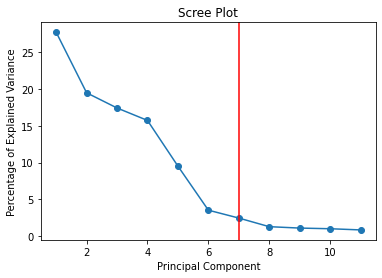

In [ ]:
percentage_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=7, color='red', linestyle='-')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

We have a reduction from 11 to 7 features and the table below will demonstrate that clearly.

In [ ]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Explained Var Ratio'] = evr
pca_df['Cumulative Var Ratio'] = cvr
display(pca_df.head(11))

,Explained Var Ratio,Cumulative Var Ratio
0,0.276792,0.276792
1,0.194606,0.471398
2,0.174012,0.645410
3,0.157112,0.802523
4,0.095127,0.897650
5,0.035307,0.932956
6,0.024571,0.957527
7,0.012917,0.970443
8,0.010968,0.981411
9,0.010119,0.991530


Implementation of the Random Forest after the PCA reduction

In [ ]:
X_pca = pca_data_reduced

y_pca = y

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=0) # 70/30 partition

model_pca = RandomForestClassifier(n_estimators=100, random_state=0) # 100 trees

model_pca.fit(X_train_pca, y_train_pca)

score_pca = model_pca.score(X_test_pca, y_test_pca)

y_pred_pca = model_pca.predict(X_test_pca)

print('Random Forest Classifier PCA MCC           : {:.2f}'.format(matthews_corrcoef( y_test_pca , y_pred_pca)))
print("Random Forest Classifier PCA roc auc score : {:.2f}".format(roc_auc_score(y_test_pca,y_pred_pca)))
print("\n",classification_report(y_pred_pca, y_test_pca))

print(confusion_matrix(y_test_pca, y_pred_pca))

print('\n', model_pca.feature_importances_)

Random Forest Classifier PCA MCC           : 0.34
Random Forest Classifier PCA roc auc score : 0.67

               precision    recall  f1-score   support

           0       0.77      0.80      0.79        60
           1       0.57      0.53      0.55        30

    accuracy                           0.71        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.71      0.71      0.71        90

[[48 14]
 [12 16]]

 [0.12414481 0.09278326 0.0904859  0.11284405 0.11445321 0.15749818
 0.30779059]


In [ ]:
ratios(a=48, b=14, c=12, d=16)

TN ratio: 0.80
TP ratio: 0.53


It is obvious that after the reduction of dimensionality we have a reduced accuracy score

In [ ]:
print("Rf accuracy score:", score)
print("Rf with PCA reduction:", score_pca)

Rf accuracy score: 0.7444444444444445
Rf with PCA reduction: 0.7111111111111111


# **5)Graffic comparison of the two methods**

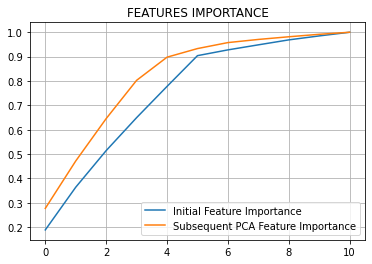

In [ ]:
initial_importance = model.feature_importances_.tolist()
initial_importance.sort(reverse=True)

plt.figure()
plt.title("FEATURES IMPORTANCE")
plt.plot(np.cumsum(initial_importance), label='Initial Feature Importance')
plt.plot(cvr, label='Subsequent PCA Feature Importance')
plt.grid(True)
plt.legend()
plt.show()

# **PART B: Pipeline and Optimization**

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental    import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
ppln = Pipeline([("scaler",MinMaxScaler()), ('pca_ppln', PCA()), ('clf_ppln', RandomForestClassifier())])

Xtrain.shape


(209, 11)

In [ ]:
# dict keys 
ppln.get_params()

{'clf_ppln': RandomForestClassifier(),
 'clf_ppln__bootstrap': True,
 'clf_ppln__ccp_alpha': 0.0,
 'clf_ppln__class_weight': None,
 'clf_ppln__criterion': 'gini',
 'clf_ppln__max_depth': None,
 'clf_ppln__max_features': 'auto',
 'clf_ppln__max_leaf_nodes': None,
 'clf_ppln__max_samples': None,
 'clf_ppln__min_impurity_decrease': 0.0,
 'clf_ppln__min_samples_leaf': 1,
 'clf_ppln__min_samples_split': 2,
 'clf_ppln__min_weight_fraction_leaf': 0.0,
 'clf_ppln__n_estimators': 100,
 'clf_ppln__n_jobs': None,
 'clf_ppln__oob_score': False,
 'clf_ppln__random_state': None,
 'clf_ppln__verbose': 0,
 'clf_ppln__warm_start': False,
 'memory': None,
 'pca_ppln': PCA(),
 'pca_ppln__copy': True,
 'pca_ppln__iterated_power': 'auto',
 'pca_ppln__n_components': None,
 'pca_ppln__random_state': None,
 'pca_ppln__svd_solver': 'auto',
 'pca_ppln__tol': 0.0,
 'pca_ppln__whiten': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('s

In [ ]:
ppln.set_params(clf_ppln__random_state=0)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca_ppln', PCA()),
                ('clf_ppln', RandomForestClassifier(random_state=0))])

Pipeline implementation

In [ ]:
ppln.fit(Xtrain, ytrain.values)

test_accuracy_ppln  = ppln.score(Xtest, ytest)

ypred = ppln.predict(Xtest)

print('Random Forest after PCA scores with pipeline:\n')
print('Random Forest Classifier PCA MCC              : {:.2f}'.format(matthews_corrcoef( ytest , ypred)))
print('Random Forest Classifier PCA roc auc score    : {:.2f}'.format(roc_auc_score(ytest  , ypred)))

print("\n" , classification_report(ytest, ypred))

print(confusion_matrix(ytest, ypred))

Random Forest after PCA scores with pipeline:

Random Forest Classifier PCA MCC              : 0.29
Random Forest Classifier PCA roc auc score    : 0.63

               precision    recall  f1-score   support

           0       0.76      0.84      0.80        62
           1       0.55      0.43      0.48        28

    accuracy                           0.71        90
   macro avg       0.66      0.63      0.64        90
weighted avg       0.70      0.71      0.70        90

[[52 10]
 [16 12]]


In [ ]:
ratios(a=53, b=9, c=16, d=12)

TN ratio: 0.77
TP ratio: 0.57


With the pipeline fitted we see that we have some minor impromevement in the accuracy of the model but the scores of the classification report are lower.

**Optimization with GridSearchCV**

In [ ]:
# set grid
grid = {
    'pca_ppln__n_components'             : [ 2, 5, 7, 9, 11]     ,
    'clf_ppln__min_samples_leaf'         : [1, 2, 3]             ,
    'clf_ppln__n_estimators'             : np.arange(10,100,10)  ,
    'clf_ppln__random_state'             : [0,42]                ,
}

Fit model, cross validation and best parameters check.

In [ ]:
grd = GridSearchCV(ppln, grid, cv=7)

grd.fit(Xtrain, ytrain)

print("CV score=%0.2f:" % grd.best_score_)
print(grd.best_params_)

CV score=0.79:
{'clf_ppln__min_samples_leaf': 2, 'clf_ppln__n_estimators': 60, 'clf_ppln__random_state': 42, 'pca_ppln__n_components': 11}


In [ ]:
rf_gridsearch = grd.best_estimator_
ypred_gridsearch  = rf_gridsearch.predict(Xtest)

print('Random Forest after PCA scores with GridSearch:\n')
print('Random Forest Classifier PCA MCC           : {:.2f}'.format(matthews_corrcoef(ytest, ypred_gridsearch)))
print("Random Forest Classifier PCA roc auc score : {:.2f}".format(roc_auc_score(ytest, ypred_gridsearch)))

print("\n" ,classification_report(ytest, ypred_gridsearch))

print(confusion_matrix(ytest, ypred_gridsearch))



Random Forest after PCA scores with GridSearch:

Random Forest Classifier PCA MCC           : 0.36
Random Forest Classifier PCA roc auc score : 0.66

               precision    recall  f1-score   support

           0       0.77      0.89      0.83        62
           1       0.63      0.43      0.51        28

    accuracy                           0.74        90
   macro avg       0.70      0.66      0.67        90
weighted avg       0.73      0.74      0.73        90

[[55  7]
 [16 12]]


In [ ]:
ratios(a=55, b=7, c=16, d=12)

TN ratio: 0.77
TP ratio: 0.63


**Optimization with HalvingGridsearchCV**

In [ ]:
# set grid
halving = {
    "pca_ppln__n_components"          : [ 2, 5, 7, 9, 11]     ,
    'clf_ppln__max_depth'             : [3, 6, 10]            ,
    'clf_ppln__min_samples_leaf'      : [1, 2, 3]            ,
    'clf_ppln__random_state'          : [0,42]         
}


In [ ]:
halving_grd =  HalvingGridSearchCV(ppln, halving )
halving_grd.fit(Xtrain, ytrain)

print("CV score=%0.2f:" % halving_grd.best_score_)
print(halving_grd.best_params_)

CV score=0.72:
{'clf_ppln__max_depth': 3, 'clf_ppln__min_samples_leaf': 2, 'clf_ppln__random_state': 0, 'pca_ppln__n_components': 9}


In [ ]:
rf_halving = halving_grd.best_estimator_
ypred_halving  = rf_halving.predict(Xtest)

print('Random Forest after PCA scores with HalvingGridsearchCV:\n')
print('Random Forest Classifier PCA MCC           : {:.2f}'.format(matthews_corrcoef( ytest, ypred_halving)))
print('Random Forest Classifier PCA roc auc score : {:.2f}'.format(roc_auc_score(ytest, ypred_halving)))

print("\n" , classification_report(ytest, ypred_halving))

print(confusion_matrix(ytest, ypred_halving))

Random Forest after PCA scores with HalvingGridsearchCV:

Random Forest Classifier PCA MCC           : 0.44
Random Forest Classifier PCA roc auc score : 0.68

               precision    recall  f1-score   support

           0       0.78      0.94      0.85        62
           1       0.75      0.43      0.55        28

    accuracy                           0.78        90
   macro avg       0.77      0.68      0.70        90
weighted avg       0.77      0.78      0.76        90

[[58  4]
 [16 12]]


In [ ]:
ratios(a=58, b=4, c=16, d=12)

TN ratio: 0.78
TP ratio: 0.75


**Optimization with RandomizedSearchCV**

In [ ]:
# randomization of parameters
rand = {
    "pca_ppln__n_components"             : [ 3, 5, 7, 9, 11]      ,
    'clf_ppln__max_depth'                : [1, 3, 5, 7, 10]       ,
    'clf_ppln__min_samples_leaf'         : [5, 10, 15, 20]        ,
    'clf_ppln__n_estimators'             : [30, 70, 100, 150, 200],
    'clf_ppln__max_features'             : [2,3]                  , 
    'clf_ppln__random_state'             : [0,42]         
}

In [ ]:
Rndm =  RandomizedSearchCV(ppln, rand, random_state=42)
Rndm.fit(Xtrain, ytrain)

print("CV score=%0.2f:" % Rndm.best_score_)
print(Rndm.best_params_)

CV score=0.73:
{'pca_ppln__n_components': 9, 'clf_ppln__random_state': 42, 'clf_ppln__n_estimators': 150, 'clf_ppln__min_samples_leaf': 5, 'clf_ppln__max_features': 2, 'clf_ppln__max_depth': 10}


In [ ]:
rf_rand = Rndm.best_estimator_
ypred_rand  = rf_rand.predict(Xtest)

print('Random Forest after PCA scores with RandomizedSearchCV:\n')
print('Random Forest Classifier PCA MCC           : {:.2f}'.format(matthews_corrcoef(ytest , ypred_rand)))
print('Random Forest Classifier PCA roc auc score : {:.2f}'.format(roc_auc_score(ytest, ypred_rand)))

print("\n" , classification_report(ytest, ypred_rand))

print(confusion_matrix(ytest, ypred_rand))

Random Forest after PCA scores with RandomizedSearchCV:

Random Forest Classifier PCA MCC           : 0.36
Random Forest Classifier PCA roc auc score : 0.66

               precision    recall  f1-score   support

           0       0.77      0.89      0.83        62
           1       0.63      0.43      0.51        28

    accuracy                           0.74        90
   macro avg       0.70      0.66      0.67        90
weighted avg       0.73      0.74      0.73        90

[[55  7]
 [16 12]]


In [ ]:
ratios(a=55 ,b=7 ,c=16 ,d=12)

TN ratio: 0.77
TP ratio: 0.63


Optimization with HalvingRandomizedSearchCv

In [ ]:
# set grid
halvingrand = {
    "pca_ppln__n_components"          : [ 2, 5, 7, 9, 11]     ,
    'clf_ppln__max_depth'             : [3, 6, 10]            ,
    'clf_ppln__min_samples_leaf'      : [1, 2, 3]            ,
    'clf_ppln__random_state'          : [0,42]         
}


In [ ]:
Halv_Rndm =  HalvingRandomSearchCV(ppln, halvingrand, random_state=42)
Halv_Rndm.fit(Xtrain, ytrain)

print("CV score=%0.2f:" % Halv_Rndm.best_score_)
print(Halv_Rndm.best_params_)

CV score=0.74:
{'pca_ppln__n_components': 11, 'clf_ppln__random_state': 0, 'clf_ppln__min_samples_leaf': 2, 'clf_ppln__max_depth': 6}


In [ ]:
rf_halv_rand = Halv_Rndm.best_estimator_
ypred_halv_rand  = rf_halv_rand.predict(Xtest)

print('Random Forest after PCA scores with HalvingRandomSearchCV:\n')
print('Random Forest Classifier PCA MCC           : {:.2f}'.format(matthews_corrcoef(ytest , ypred_halv_rand)))
print('Random Forest Classifier PCA roc auc score : {:.2f}'.format(roc_auc_score(ytest, ypred_halv_rand)))

print("\n" , classification_report(ytest, ypred_halv_rand))

print(confusion_matrix(ytest, ypred_halv_rand))

Random Forest after PCA scores with HalvingRandomSearchCV:

Random Forest Classifier PCA MCC           : 0.33
Random Forest Classifier PCA roc auc score : 0.65

               precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.60      0.43      0.50        28

    accuracy                           0.73        90
   macro avg       0.69      0.65      0.66        90
weighted avg       0.72      0.73      0.72        90

[[54  8]
 [16 12]]


In [ ]:
ratios(a=54 ,b=8 ,c=16,d=12)

TN ratio: 0.77
TP ratio: 0.60


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('hfd.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.



ValueError: ignored